## **Bibliotecas**

In [1]:
import pandas as pd
from google.colab import files
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## **Importando a Base de Dados**

In [2]:
uploaded = files.upload()
df = pd.read_csv('Online Sales Data.csv')
df.head()

Saving Online Sales Data.csv to Online Sales Data.csv


,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


## **Analisando a Base de Dados**

### **Duplicação**

In [ ]:
df.duplicated().any()

False

### **Colunas**

In [ ]:
df.columns

Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Method'],
      dtype='object')

### **Linhas e Colunas**

In [ ]:
df.shape

(240, 9)

### **Células Nulas**

In [ ]:
df.isnull().any().any()

False

## **Faturamento Total**

In [ ]:
faturamento_total = df['Total Revenue'].sum()
print(f'Faturamento Total: USD {faturamento_total:.2f}')

Faturamento Total: USD 80567.85


## **Preço Médio por Venda**

In [ ]:
preco_medio = df['Total Revenue'].mean()
print(f'Preço Médio por Venda: USD {preco_medio:.2f}')

Preço Médio por Venda: USD 335.70


## **Tipos de Produto**

In [ ]:
tipo_produto = df['Product Name'].nunique()
print(f'Tipos de Produto: {tipo_produto}')

Tipos de Produto: 232


## **Categorias**

In [ ]:
categorias = df['Product Category'].nunique()
print(f'Tipos de Categoria: {categorias}')

Tipos de Categoria: 6


## **Quantas Regiões?**

In [4]:
regioes = df['Region'].nunique()
print(f'Regiões: {regioes}')

Regiões: 3


## **Forma de Pagamento Mais Usada**

In [19]:
forma_pagamento = df['Payment Method'].value_counts()
display(forma_pagamento)

Payment Method
Credit Card    120
PayPal          80
Debit Card      40
Name: count, dtype: int64

In [25]:
names = forma_pagamento.index
values = forma_pagamento

graph = px.pie(forma_pagamento, names=names, values=values, title="Forma de Pagamento")
graph.show(renderers='png')

## **Vendas por Região**


In [23]:
vendas_regiao = df['Region'].value_counts()
print(vendas_regiao)

Region
North America    80
Europe           80
Asia             80
Name: count, dtype: int64


In [24]:
labels = vendas_regiao.index
values = vendas_regiao

graph = px.pie(vendas_regiao,names=labels,values=values,title='Vendas por Região')
graph.show(renderers='png')

## **Vendas por Categoria**

In [27]:
venda_categoria = df['Product Category'].value_counts()
print(venda_categoria)

Product Category
Electronics        40
Home Appliances    40
Clothing           40
Books              40
Beauty Products    40
Sports             40
Name: count, dtype: int64


In [28]:
labels = venda_categoria.index
values = venda_categoria

graph = px.pie(venda_categoria,names=labels,values=values,title='Vendas por Categoria')
graph.show(renderers='png')

## **Produto Mais Vendido**

In [ ]:
produto_mais_vendido = df[['Product Name','Units Sold']].groupby('Product Name').sum().sort_values('Units Sold',ascending=False).idxmax()
print(f'Produto Mais Vendido: {produto_mais_vendido}')

Produto Mais Vendido: Units Sold    Hanes ComfortSoft T-Shirt
dtype: object


## **Produto Com Maior Faturamento**

In [ ]:
produto_maior_faturamento = df[['Product Name','Total Revenue']].groupby('Product Name').sum().sort_values('Total Revenue',ascending=False).idxmax()
display(produto_maior_faturamento)

Total Revenue    Canon EOS R5 Camera
dtype: object

## **Produtos por Região**

In [29]:
produto_regiao = df[['Product Name', 'Region', 'Units Sold']].groupby(['Region', 'Product Name']).sum()

produto_regiao = produto_regiao.reset_index()

idx = produto_regiao.groupby('Region')['Units Sold'].idxmax()

produto_mais_vendido = produto_regiao.loc[idx]

display(produto_mais_vendido)

,Region,Product Name,Units Sold
30,Asia,Hanes ComfortSoft T-Shirt,10
103,Europe,Dyson Supersonic Hair Dryer,3
208,North America,The Catcher in the Rye by J.D. Salinger,7


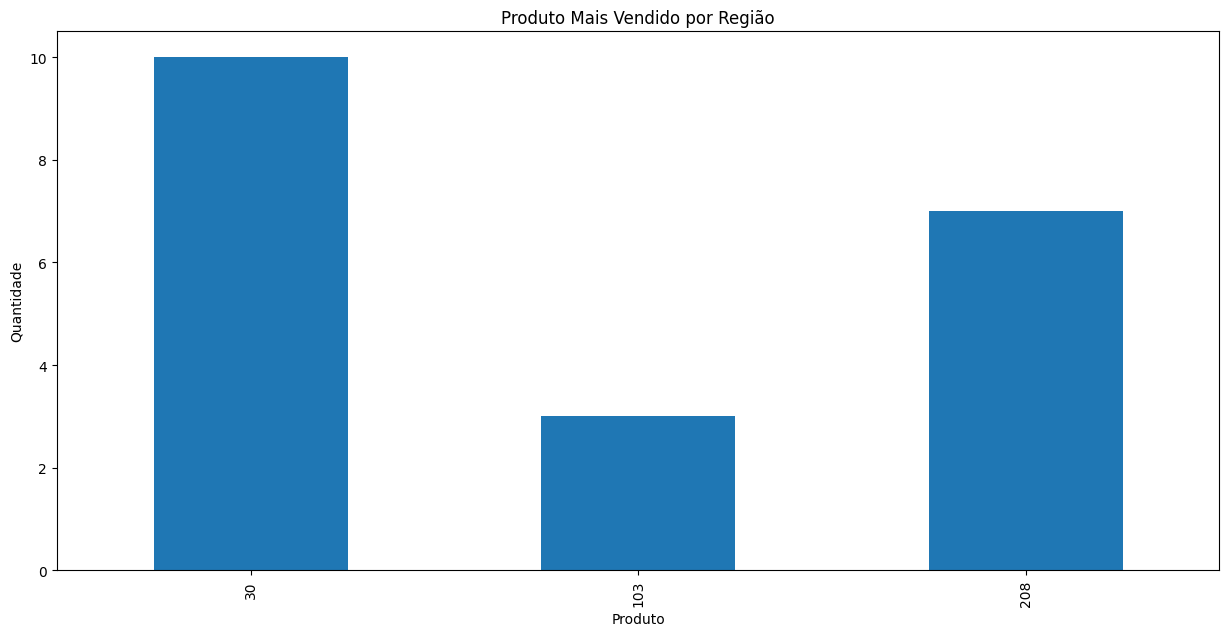

In [31]:
produto_mais_vendido.plot(kind='bar',figsize=(15,7),legend=False)
plt.title('Produto Mais Vendido por Região')
plt.ylabel('Quantidade')
plt.xlabel('Produto')
plt.show()

## **Produto de Maior Faturamento por Região**

In [7]:
produto_faturamento_regiao = df[['Product Name','Region','Total Revenue']].groupby(['Region','Product Name']).sum().sort_values('Total Revenue',ascending=False)
produto_faturamento_regiao = produto_faturamento_regiao.reset_index()

idx = produto_faturamento_regiao.groupby('Region')['Total Revenue'].idxmax()
top_produto_faturamento_regiao = produto_faturamento_regiao.loc[idx].sort_values('Total Revenue',ascending=False)

display(top_produto_faturamento_regiao)

,Region,Product Name,Total Revenue
0,North America,Canon EOS R5 Camera,3899.99
1,Europe,LG OLED TV,2599.98
5,Asia,Peloton Bike,1895.00


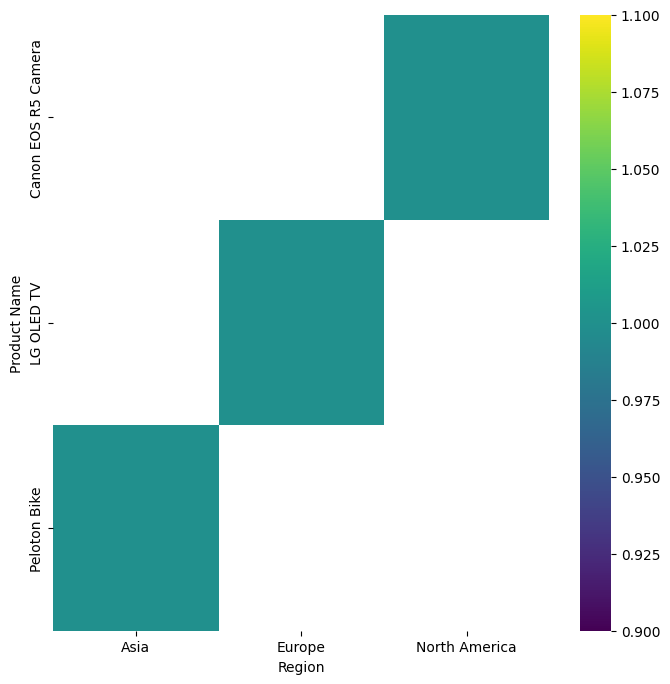

In [8]:
# @title Region vs Product Name

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Product Name'].value_counts()
    for x_label, grp in top_produto_faturamento_regiao.groupby('Region')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Region')
_ = plt.ylabel('Product Name')

## **Faturamento por Região**

In [ ]:
faturamento_regiao = df[['Region','Total Revenue']].groupby('Region').sum().sort_values('Total Revenue',ascending=False)
display(faturamento_regiao)

,Total Revenue
Region,
North America,36844.34
Asia,22455.45
Europe,21268.06


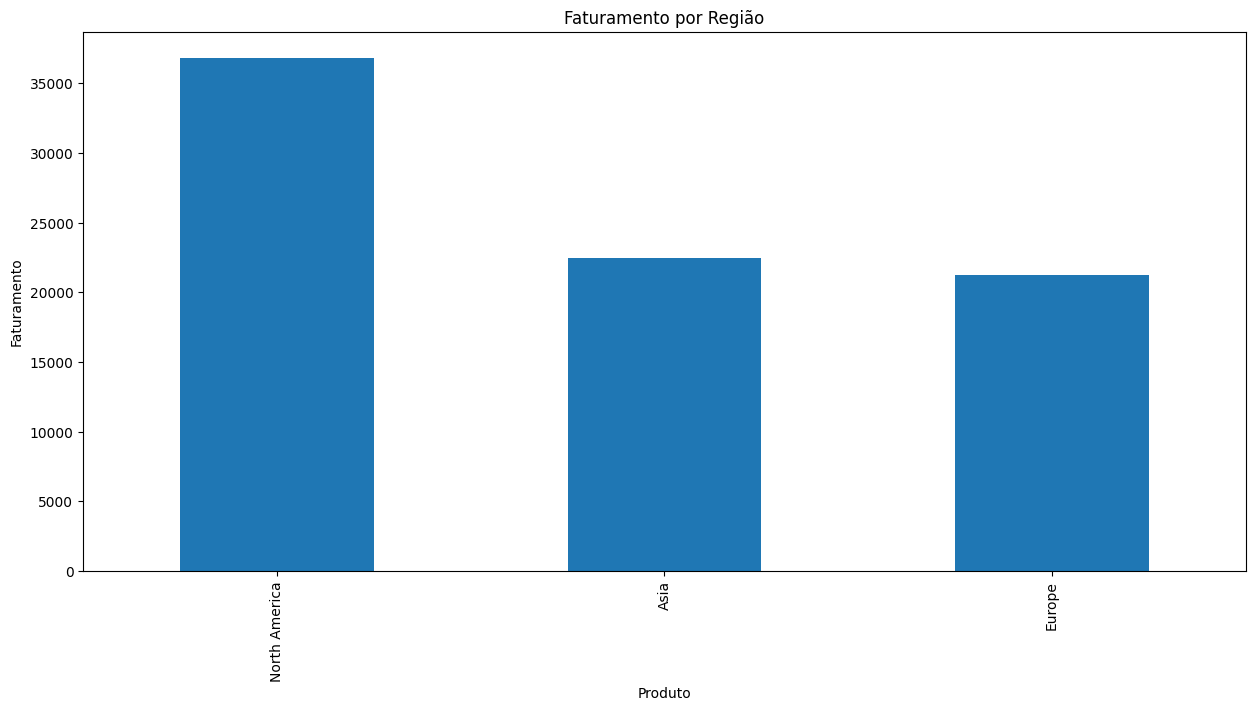

In [ ]:
faturamento_regiao.plot(kind='bar',figsize=(15,7),legend=False)
plt.title('Faturamento por Região')
plt.ylabel('Faturamento')
plt.xlabel('Produto')
plt.show()

## **Faturamento por Categoria**

In [11]:
faturamento_categoria = df[['Product Category','Total Revenue']].groupby('Product Category').sum().sort_values('Total Revenue',ascending=False)
display(faturamento_categoria)

,Total Revenue
Product Category,
Electronics,34982.41
Home Appliances,18646.16
Sports,14326.52
Clothing,8128.93
Beauty Products,2621.90
Books,1861.93


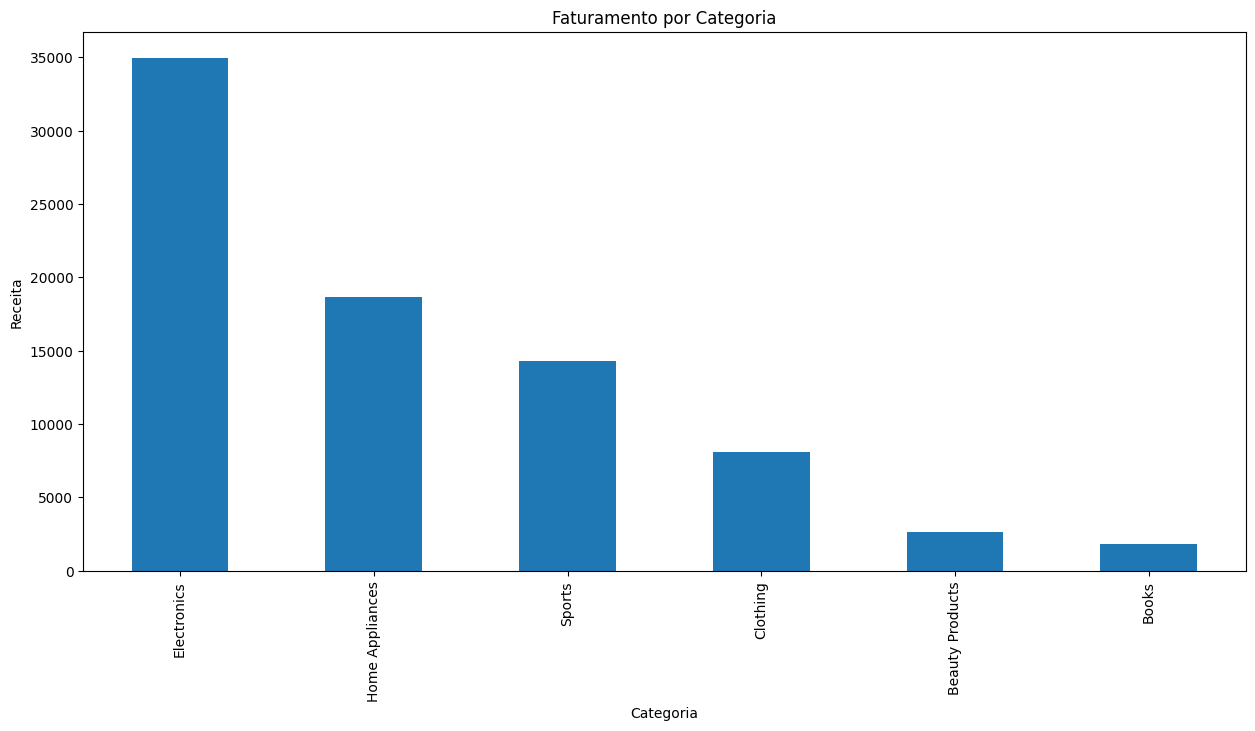

In [13]:
faturamento_categoria.plot(kind='bar',figsize=(15,7),legend=False)
plt.title('Faturamento por Categoria')
plt.ylabel('Receita')
plt.xlabel('Categoria')
plt.show()

## **Categoria por Região**

In [ ]:
categoria_regiao = df[['Product Category', 'Region']].groupby(['Region', 'Product Category']).size().reset_index(name='Count')
idx = categoria_regiao.groupby('Region')['Count'].idxmax()
produto_mais_vendido = produto_regiao.loc[idx]
display(categoria_regiao)

,Region,Product Category,Count
0,Asia,Clothing,40
1,Asia,Sports,40
2,Europe,Beauty Products,40
3,Europe,Home Appliances,40
4,North America,Books,40
5,North America,Electronics,40


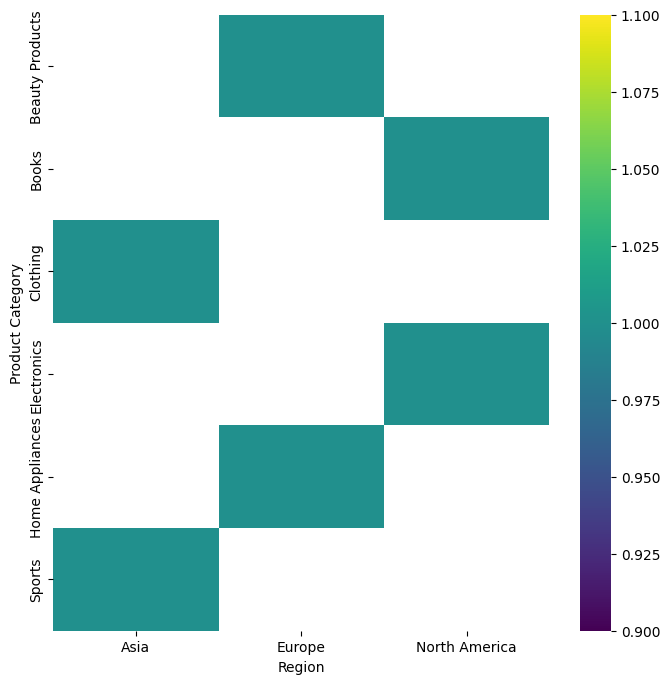

In [ ]:
# @title Region vs Product Category

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Product Category'].value_counts()
    for x_label, grp in categoria_regiao.groupby('Region')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Region')
_ = plt.ylabel('Product Category')

## **Vendas por Dia**

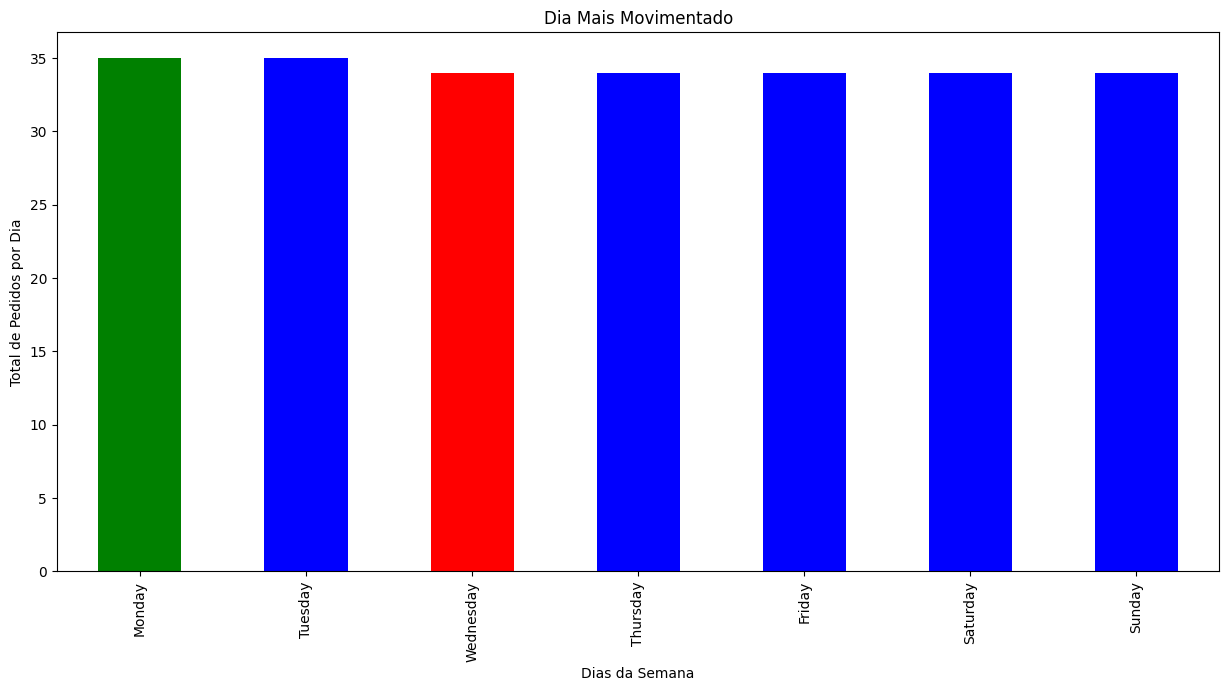

In [ ]:
#convertendo a coluna 'Date' para datetime
df['Date'] = pd.to_datetime(df['Date'])

#lista para armazenar dias e nomes da semana
day_name = []
day_week = []

for i in range(len(df)):
    day_name.append(df.Date[i].day_name())
    day_week.append(df.Date[i].dayofweek)

#criando novas colunas
df['day_name'] = day_name
df['day_week'] = day_week

dias_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dia_mais_movimentado = df['day_name'].value_counts().reindex(dias_semana, fill_value=0)

# Encontrando os dias com mais e menos vendas
maior_indice = df['day_name'].value_counts().idxmax()
menor_indice = df['day_name'].value_counts().idxmin()

# Definindo as cores das barras no gráfico
colors = ['red' if i == menor_indice else 'green' if i == maior_indice else 'blue' for i in dia_mais_movimentado.index]

# Plotando o gráfico
dia_mais_movimentado.plot(kind='bar', figsize=(15,7), legend=False, color=colors)
plt.title('Dia Mais Movimentado')
plt.ylabel('Total de Pedidos por Dia')
plt.xlabel('Dias da Semana')
plt.show()

## **Vendas por Mês**

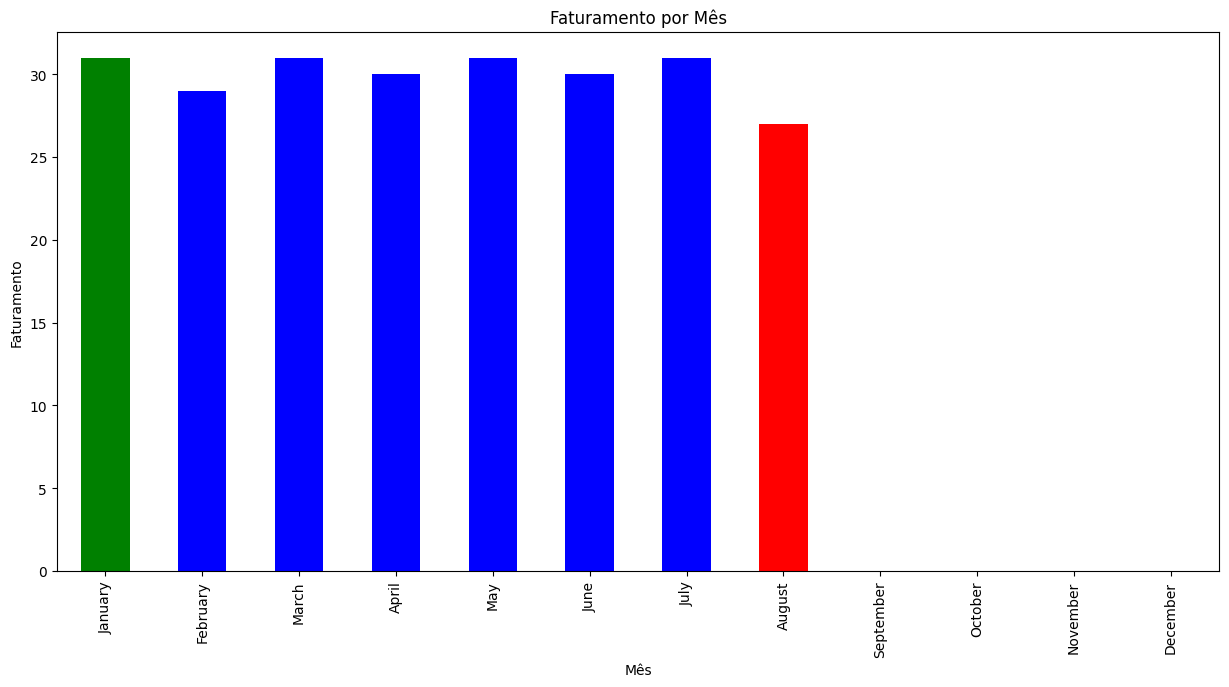

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

df['month_name'] = df['Date'].dt.month_name()
df['month'] = df['Date'].dt.month

months = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]

faturamento_por_mes = df[['month_name','month','Total Revenue']].groupby(['month_name','month']).sum().sort_values(by='Total Revenue',ascending=True)
faturamento_por_mes = df['month_name'].value_counts().reindex(months,fill_value=0)

maior_indice = df['month_name'].value_counts().idxmax()
menor_indice = df['month_name'].value_counts().idxmin()

colors = ['red' if i == menor_indice else 'green' if i == maior_indice else 'blue' for i in faturamento_por_mes.index]

# Plotando o gráfico
faturamento_por_mes.plot(kind='bar', figsize=(15,7), legend=False, color=colors)
plt.title('Faturamento por Mês')
plt.ylabel('Faturamento')
plt.xlabel('Mês')
plt.show()

## **Dias com Maior Faturamento**

In [ ]:
dia_mais_vendas = df[['Date','Total Revenue']].groupby('Date').sum().sort_values('Total Revenue',ascending=False)
dia_mais_vendas.head()

,Total Revenue
Date,
2024-04-12,3899.99
2024-03-26,2599.98
2024-01-07,2499.99
2024-08-04,2399.00
2024-01-01,1999.98


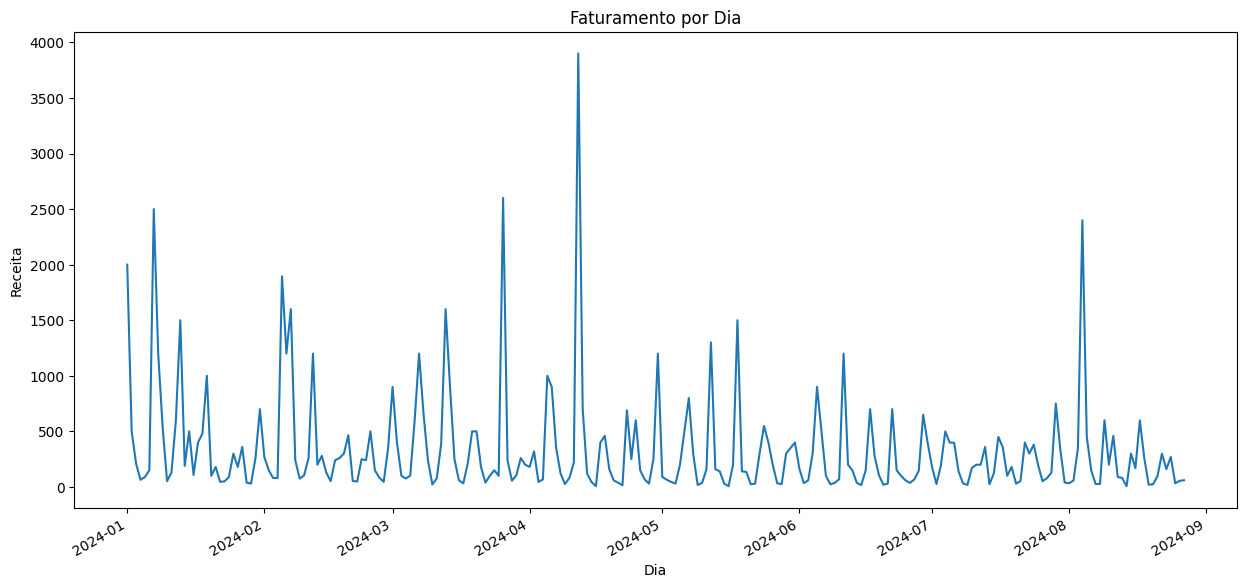

In [ ]:
dia_mais_vendas.plot(kind='line',figsize=(15,7),legend=False)
plt.title('Faturamento por Dia')
plt.ylabel('Receita')
plt.xlabel('Dia')
plt.show()